# 01. 데이터 개요 (Data Overview)

## 목표
- 데이터 구조 파악
- 기본 통계량 확인
- 타깃 변수 분포 확인
- A/B 검사 유형별 특성 파악

In [15]:
import sys
sys.path.append('../utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from common_utils import load_data, print_data_info

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)



## 1. 데이터 로드

In [16]:
# 데이터 로드
train, test, train_a, train_b, test_a, test_b = load_data()


print(f"\ntrain.csv: {train.shape}")
print(f"test.csv: {test.shape}")
print(f"train/A.csv: {train_a.shape}")
print(f"train/B.csv: {train_b.shape}")
print(f"test/A.csv: {test_a.shape}")
print(f"test/B.csv: {test_b.shape}")


train.csv: (944767, 3)
test.csv: (10, 2)
train/A.csv: (647241, 37)
train/B.csv: (297526, 31)
test/A.csv: (4, 37)
test/B.csv: (6, 31)


## 2. 기본 정보 확인

In [17]:
# Train 데이터 정보
print_data_info(train, 'train.csv')


train.csv 정보
Shape: (944767, 3)
Columns: ['Test_id', 'Test', 'Label']

Data Types:
Test_id    object
Test       object
Label       int64
dtype: object

Missing Values:
Series([], dtype: int64)

Basic Statistics:
               Label
count  944767.000000
mean        0.028877
std         0.167461
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


In [18]:
# Train A 데이터 정보
print_data_info(train_a.head(1000), 'train/A.csv (샘플 1000개)')


train/A.csv (샘플 1000개) 정보
Shape: (1000, 37)
Columns: ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'A1-1', 'A1-2', 'A1-3', 'A1-4', 'A2-1', 'A2-2', 'A2-3', 'A2-4', 'A3-1', 'A3-2', 'A3-3', 'A3-4', 'A3-5', 'A3-6', 'A3-7', 'A4-1', 'A4-2', 'A4-3', 'A4-4', 'A4-5', 'A5-1', 'A5-2', 'A5-3', 'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']

Data Types:
Test_id       object
Test          object
PrimaryKey    object
Age           object
TestDate       int64
A1-1          object
A1-2          object
A1-3          object
A1-4          object
A2-1          object
A2-2          object
A2-3          object
A2-4          object
A3-1          object
A3-2          object
A3-3          object
A3-4          object
A3-5          object
A3-6          object
A3-7          object
A4-1          object
A4-2          object
A4-3          object
A4-4          object
A4-5          object
A5-1          object
A5-2          object
A5-3          object
A6-1           int64
A7-1           

In [19]:
# Train B 데이터 정보
print_data_info(train_b.head(1000), 'train/B.csv (샘플 1000개)')


train/B.csv (샘플 1000개) 정보
Shape: (1000, 31)
Columns: ['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'B1-1', 'B1-2', 'B1-3', 'B2-1', 'B2-2', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6', 'B7', 'B8', 'B9-1', 'B9-2', 'B9-3', 'B9-4', 'B9-5', 'B10-1', 'B10-2', 'B10-3', 'B10-4', 'B10-5', 'B10-6']

Data Types:
Test_id       object
Test          object
PrimaryKey    object
Age           object
TestDate       int64
B1-1          object
B1-2          object
B1-3          object
B2-1          object
B2-2          object
B2-3          object
B3-1          object
B3-2          object
B4-1          object
B4-2          object
B5-1          object
B5-2          object
B6            object
B7            object
B8            object
B9-1           int64
B9-2           int64
B9-3           int64
B9-4           int64
B9-5           int64
B10-1          int64
B10-2          int64
B10-3          int64
B10-4          int64
B10-5          int64
B10-6          int64
dtype: object

Missin

## 3. 타깃 변수 분포 분석

In [20]:
# 타깃 분포
print("="*60)
print("타깃 변수 (Label) 분포")
print("="*60)
print(train['Label'].value_counts())
print(f"\n위험군 비율: {train['Label'].mean():.2%}")
print(f"비위험군 비율: {(1 - train['Label'].mean()):.2%}")

타깃 변수 (Label) 분포
Label
0    917485
1     27282
Name: count, dtype: int64

위험군 비율: 2.89%
비위험군 비율: 97.11%


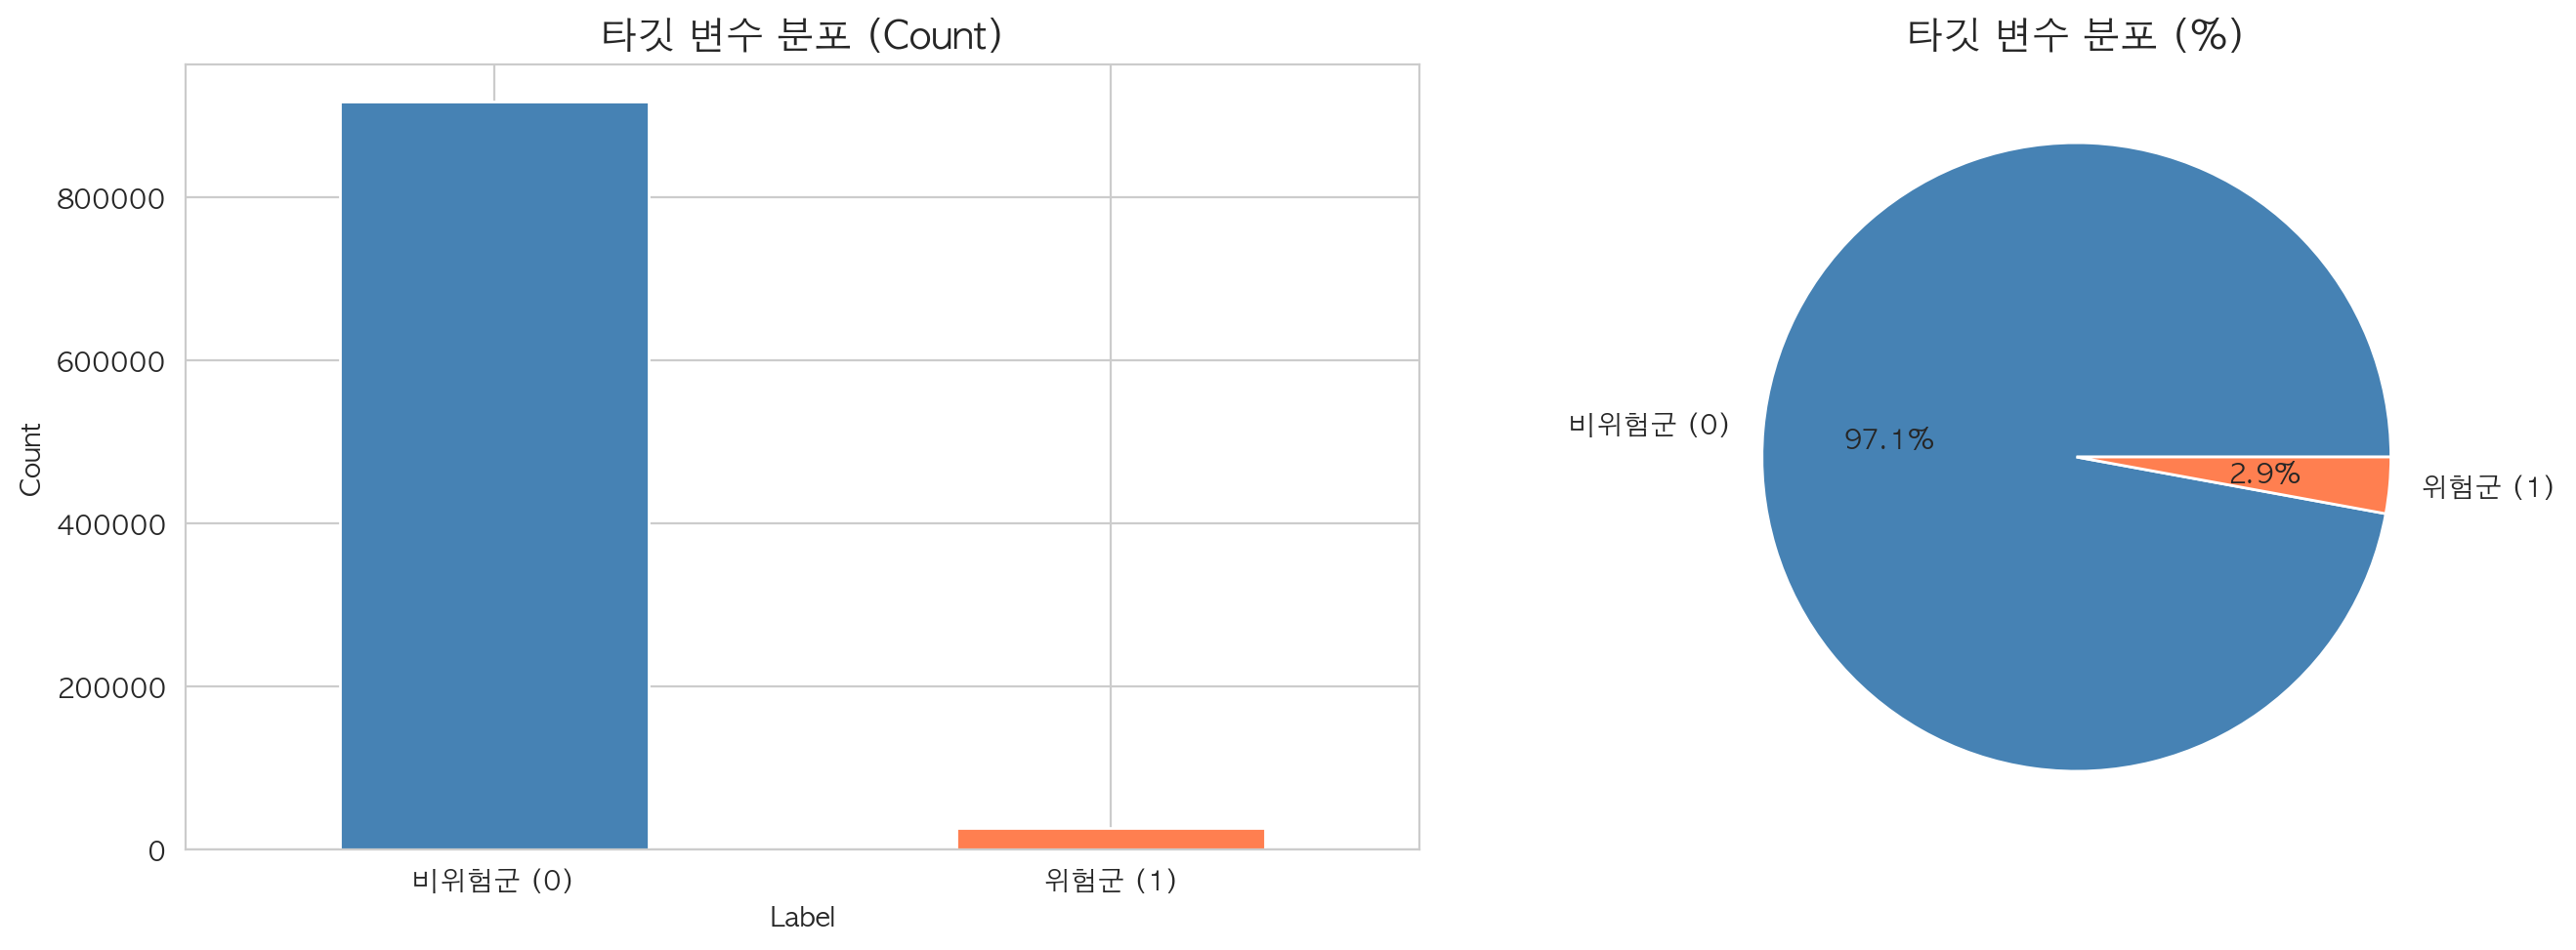

시각화 저장: ../output/figures/01_target_distribution.png


In [30]:
# 타깃 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False
# 막대 그래프
train['Label'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('타깃 변수 분포 (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['비위험군 (0)', '위험군 (1)'], rotation=0)

# 파이 차트
train['Label'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                    colors=['steelblue', 'coral'],
                                    labels=['비위험군 (0)', '위험군 (1)'])
axes[1].set_title('타깃 변수 분포 (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../output/figures/01_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("시각화 저장: ../output/figures/01_target_distribution.png")

## 4. 검사 유형 (Test) 분포

In [31]:
# 검사 유형별 분포
print("="*60)
print("검사 유형 (Test) 분포")
print("="*60)
print(train['Test'].value_counts())
print(f"\nA 검사 비율: {(train['Test'] == 'A').mean():.2%}")
print(f"B 검사 비율: {(train['Test'] == 'B').mean():.2%}")

검사 유형 (Test) 분포
Test
A    647241
B    297526
Name: count, dtype: int64

A 검사 비율: 68.51%
B 검사 비율: 31.49%


In [32]:
# 검사 유형별 위험군 비율
test_label_dist = train.groupby('Test')['Label'].agg(['mean', 'count'])
test_label_dist.columns = ['위험군 비율', '샘플 수']
print("\n검사 유형별 위험군 비율:")
print(test_label_dist)


검사 유형별 위험군 비율:
        위험군 비율    샘플 수
Test                  
A     0.022699  647241
B     0.042316  297526


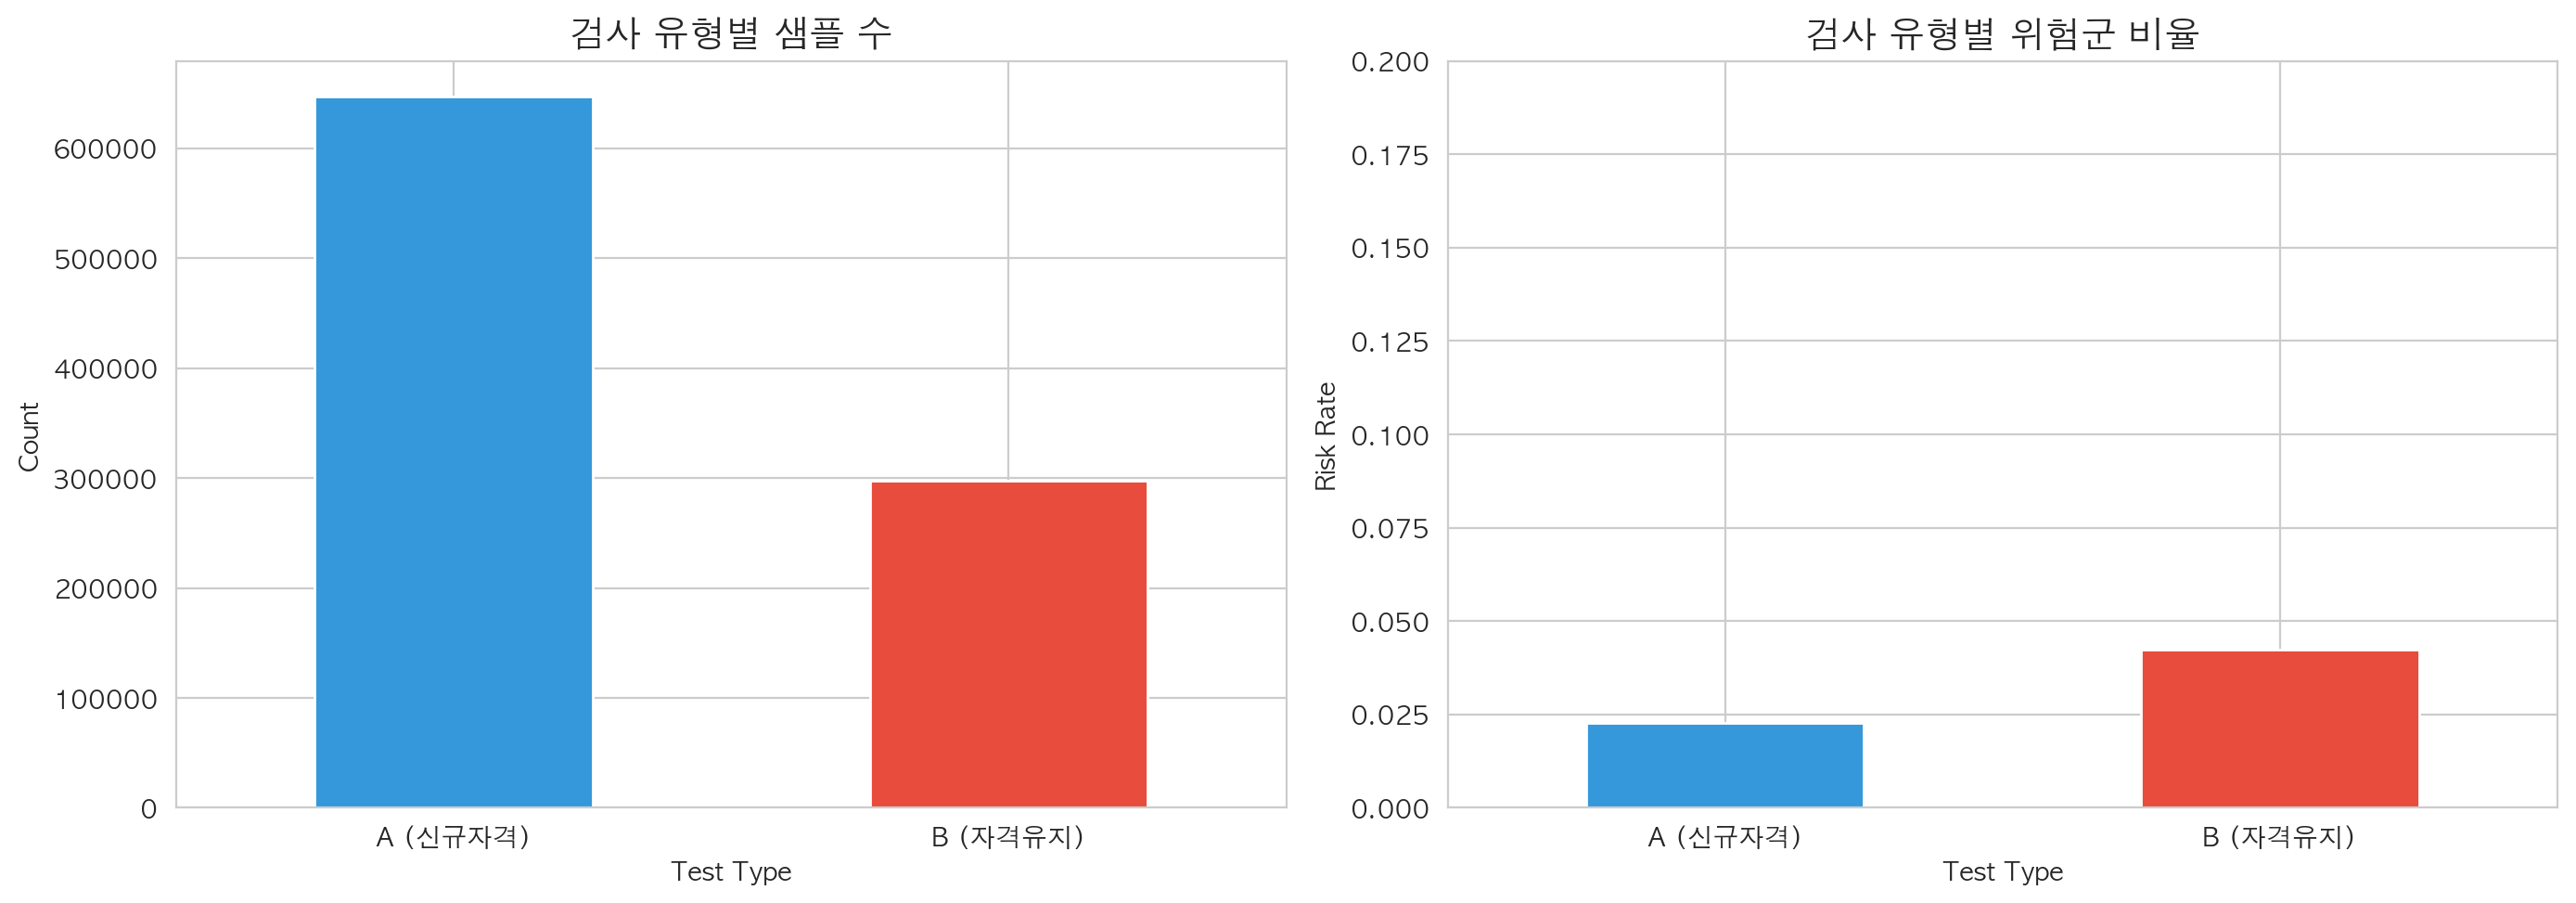

시각화 저장: ../output/figures/02_test_type_distribution.png


In [33]:
# 검사 유형별 위험군 비율 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 샘플 수
train['Test'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('검사 유형별 샘플 수', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Test Type')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['A (신규자격)', 'B (자격유지)'], rotation=0)

# 위험군 비율
test_label_dist['위험군 비율'].plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'])
axes[1].set_title('검사 유형별 위험군 비율', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Test Type')
axes[1].set_ylabel('Risk Rate')
axes[1].set_xticklabels(['A (신규자격)', 'B (자격유지)'], rotation=0)
axes[1].set_ylim([0, 0.2])

plt.tight_layout()
plt.savefig('../output/figures/02_test_type_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("시각화 저장: ../output/figures/02_test_type_distribution.png")

## 5. A 검사 데이터 샘플링

In [34]:
# A 검사 샘플
print("="*60)
print("A 검사 데이터 샘플 (상위 5개)")
print("="*60)
display(train_a.head())

print("\nA 검사 컬럼 목록:")
print(train_a.columns.tolist())

A 검사 데이터 샘플 (상위 5개)


,Test_id,Test,PrimaryKey,Age,TestDate,A1-1,A1-2,A1-3,A1-4,A2-1,...,A5-3,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5
0,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,A,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,60a,201801,"2,2,1,1,1,2,1,1,2,2,1,2,2,2,2,1,1,1","2,1,2,2,1,2,2,3,1,1,1,3,3,3,2,3,1,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-32,42,10,-6,-11,-20,-80,-54,16,-4,14,33,50,8,...","0,0,2,3,3,3,2,1,2,2,1,2,1,3,3,3,2,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",5,10,6,1,4,11,1,6,5
1,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,A,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,40a,201801,"1,1,1,2,1,2,2,2,1,1,1,2,2,1,2,2,1,2","2,1,3,2,3,2,1,3,1,1,2,1,2,3,3,3,2,1","1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","636,9,-3,-26,-3,-21,29,0,14,39,44,29,81,22,0,-...","0,0,2,2,1,3,3,2,2,3,1,1,1,3,2,2,3,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12,17,8,4,9,13,2,20,6
2,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,A,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,30b,201801,"1,2,1,1,2,1,1,1,2,1,2,2,1,2,1,2,2,2","3,1,2,2,3,3,1,1,3,3,2,1,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","13,-34,4,-23,-25,-54,14,-37,-102,-79,-60,3,-11...","0,0,2,2,1,1,3,1,1,3,1,3,3,2,3,2,3,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",10,14,0,1,6,2,0,0,2
3,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,A,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,50a,201801,"2,2,2,2,2,1,1,1,1,1,2,1,2,1,1,2,1,2","1,1,3,2,3,3,1,3,1,2,2,3,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-25,-8,102,13,0,-54,-49,-62,13,-57,-26,-54,-89...","0,2,2,1,3,3,1,1,3,3,3,2,2,3,1,2,1,3",...,"1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,...",10,7,7,2,21,15,3,17,13
4,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,A,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,50a,201801,"2,1,2,2,2,2,1,1,1,2,2,1,1,1,1,2,1,2","2,1,2,2,3,1,2,3,3,1,1,2,2,1,1,3,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-9,-37,-55,-3,-25,-21,-6,48,56,16,-47,-12,50,3...","0,0,2,1,2,2,3,3,1,3,2,1,3,2,2,1,3,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",11,15,3,0,6,18,7,18,5



A 검사 컬럼 목록:
['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'A1-1', 'A1-2', 'A1-3', 'A1-4', 'A2-1', 'A2-2', 'A2-3', 'A2-4', 'A3-1', 'A3-2', 'A3-3', 'A3-4', 'A3-5', 'A3-6', 'A3-7', 'A4-1', 'A4-2', 'A4-3', 'A4-4', 'A4-5', 'A5-1', 'A5-2', 'A5-3', 'A6-1', 'A7-1', 'A8-1', 'A8-2', 'A9-1', 'A9-2', 'A9-3', 'A9-4', 'A9-5']


## 6. B 검사 데이터 샘플링

In [35]:
# B 검사 샘플
print("="*60)
print("B 검사 데이터 샘플 (상위 5개)")
print("="*60)
display(train_b.head())

print("\nB 검사 컬럼 목록:")
print(train_b.columns.tolist())

B 검사 데이터 샘플 (상위 5개)


,Test_id,Test,PrimaryKey,Age,TestDate,B1-1,B1-2,B1-3,B2-1,B2-2,...,B9-2,B9-3,B9-4,B9-5,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,B,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.03798499,0,0.5811322,0,0,0.5803714,1.00910...","3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4","1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1","0.8907053,0,0,0,0,1.040678,0.6199818,0,0,0.657...",...,0,0,35,1,20,0,3,57,7,15
1,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,B,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,60b,201602,"1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1","0,0,0,0.1280282,0,0,0.9760087,0.03197882,0,0.0...","4,4,3,1,4,2,1,1,4,1,4,1,3,3,1,1","1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,0,0,35,2,19,1,1,59,10,19
2,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,B,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,70a,201602,"1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1","0.5967258,0,0,0,0,0,0.7050578,0.6730202,0,0.83...","1,4,4,2,4,3,1,1,4,1,1,3,1,3,4,1","2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1","0,0.7690769,0,0,0.7381148,0,0,0.9290089,0,0,0....",...,0,0,35,0,18,2,0,60,5,19
3,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,B,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0.6738921,0,0.5439928,0.5342392,0.424049...","4,4,4,1,4,1,1,1,3,1,4,1,4,4,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","0.5470542,0,0,0,0,0.5041592,0.542075,0,0,0.740...",...,0,0,35,6,19,1,2,58,4,20
4,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,B,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.3119312,0,0.03894603,0,0,0.03889565,0.0389...","4,1,3,1,4,3,1,1,4,1,3,1,1,1,4,3","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4689675,0,0,0.03903218,0,0.7800297,0,0.54600...",...,0,1,34,0,20,0,0,60,14,20



B 검사 컬럼 목록:
['Test_id', 'Test', 'PrimaryKey', 'Age', 'TestDate', 'B1-1', 'B1-2', 'B1-3', 'B2-1', 'B2-2', 'B2-3', 'B3-1', 'B3-2', 'B4-1', 'B4-2', 'B5-1', 'B5-2', 'B6', 'B7', 'B8', 'B9-1', 'B9-2', 'B9-3', 'B9-4', 'B9-5', 'B10-1', 'B10-2', 'B10-3', 'B10-4', 'B10-5', 'B10-6']


## 7. 결측치 분석

In [36]:
# 결측치 확인
print("="*60)
print("결측치 분석")
print("="*60)
print(f"\ntrain.csv 결측치: {train.isnull().sum().sum()}")
print(f"test.csv 결측치: {test.isnull().sum().sum()}")
print(f"train/A.csv 결측치: {train_a.isnull().sum().sum()} ({train_a.isnull().sum().sum() / train_a.size * 100:.4f}%)")
print(f"train/B.csv 결측치: {train_b.isnull().sum().sum()} ({train_b.isnull().sum().sum() / train_b.size * 100:.4f}%)")

결측치 분석

train.csv 결측치: 0
test.csv 결측치: 0
train/A.csv 결측치: 13 (0.0001%)
train/B.csv 결측치: 60 (0.0007%)


## 8. 요약 및 결론

### 주요 발견사항
1. **데이터 규모**: Train 약 94만건, A 검사 약 65만건, B 검사 약 30만건
2. **타깃 불균형**: 위험군 약 15%, 비위험군 약 85% → **불균형 처리 필요**
3. **검사 유형**: A 검사(신규자격)와 B 검사(자격유지) 간 위험군 비율 유사
4. **결측치**: 매우 적음 (< 0.01%) → 간단한 대체 전략 가능

### 다음 단계
- Feature 상세 분석 (02_feature_analysis.ipynb)
- 타깃 변수 심화 분석 (03_target_analysis.ipynb)
- Feature Engineering 설계